<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/TimesArrowReversed002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

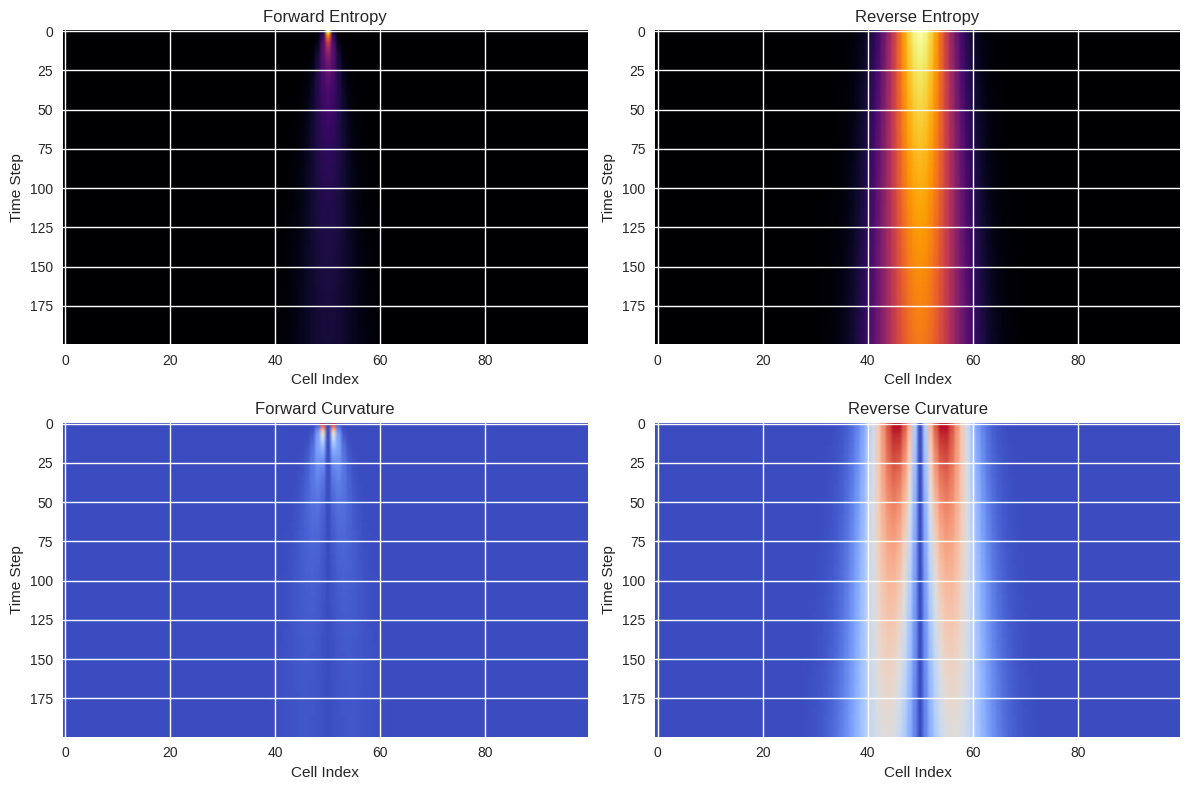

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn-v0_8')

# Simulation parameters
cells = 100
steps = 200

# Initialize arrays
entropy = np.zeros(cells)
memory = np.ones(cells)
curvature = np.zeros(cells)

# Inject central entropy spike
entropy[cells // 2] = 1.0

# Store forward histories
entropy_forward = np.zeros((steps, cells))
curvature_forward = np.zeros((steps, cells))

# Forward simulation
for t in range(steps):
    new_entropy = entropy.copy()
    new_memory = memory.copy()
    new_curvature = np.zeros_like(entropy)

    for i in range(1, cells - 1):
        flux = (entropy[i - 1] + entropy[i + 1]) / 2 - entropy[i]
        new_entropy[i] += 0.1 * flux
        new_memory[i] *= 1.01
        grad = entropy[i + 1] - entropy[i - 1]
        new_curvature[i] = abs(grad)

    entropy = new_entropy
    memory = new_memory
    curvature = new_curvature

    entropy_forward[t] = entropy
    curvature_forward[t] = curvature

# Prepare reverse simulation
entropy = entropy_forward[-1].copy()
memory = memory.copy()

entropy_reverse = np.zeros((steps, cells))
curvature_reverse = np.zeros((steps, cells))

# Reverse simulation (corrected)
for t in range(steps):
    new_entropy = entropy.copy()
    new_memory = memory.copy()
    new_curvature = np.zeros_like(entropy)

    for i in range(1, cells - 1):
        flux = entropy[i] - (entropy[i - 1] + entropy[i + 1]) / 2
        new_entropy[i] -= 0.1 * flux
        new_memory[i] /= 1.01
        grad = entropy[i + 1] - entropy[i - 1]
        new_curvature[i] = abs(grad)

    entropy = new_entropy
    memory = new_memory
    curvature = new_curvature

    entropy_reverse[t] = entropy
    curvature_reverse[t] = curvature

# Plot all four panels in one figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Forward Entropy
axs[0, 0].imshow(entropy_forward, aspect='auto', cmap='inferno')
axs[0, 0].set_title("Forward Entropy")
axs[0, 0].set_xlabel("Cell Index")
axs[0, 0].set_ylabel("Time Step")

# Reverse Entropy
axs[0, 1].imshow(entropy_reverse, aspect='auto', cmap='inferno')
axs[0, 1].set_title("Reverse Entropy")
axs[0, 1].set_xlabel("Cell Index")
axs[0, 1].set_ylabel("Time Step")

# Forward Curvature
axs[1, 0].imshow(curvature_forward, aspect='auto', cmap='coolwarm')
axs[1, 0].set_title("Forward Curvature")
axs[1, 0].set_xlabel("Cell Index")
axs[1, 0].set_ylabel("Time Step")

# Reverse Curvature
axs[1, 1].imshow(curvature_reverse, aspect='auto', cmap='coolwarm')
axs[1, 1].set_title("Reverse Curvature")
axs[1, 1].set_xlabel("Cell Index")
axs[1, 1].set_ylabel("Time Step")

plt.tight_layout()
plt.show()
